# 인공신경망
실제 인간의 뇌에서 수행되는 신경망 방식을 사용한 컴퓨터 연산 방법   
실제 뇌에서 뉴런간 정보 전달 방식을 모델링한 것   


## 퍼셉트론
신경망의 한 종류   
입력값 X를 가중치와 곱해서 모두 더한 값이 임계값 기준이 있는 노드(node)   



In [2]:
import pandas as pd
data = pd.read_csv('data.csv')

In [3]:
data

,x1,x2,y
0,True,True,False
1,True,False,True
2,True,False,True
3,True,True,False
4,True,True,False
...,...,...,...
995,True,True,False
996,True,True,False
997,False,True,True
998,False,False,False


In [4]:
# __ㅁㅁ__와 self 문법
class fruit():
  def __init__(self) -> None:
    self.cnt = 0
    self.name = []

  def add_fruit(self, name, size):
     self.name.append(name)
     self.cnt += 1
     return True

  def set_fruit(self, new_name):
      self.name = new_name

  def get_item(self):
      return self.name

  def __len__(self):
    return self.cnt

In [5]:
fruit_class = fruit()

In [6]:
fruit_class.add_fruit('apple',10)
fruit_class.add_fruit('banana',10)
fruit_class.add_fruit('orange',10)

True

In [7]:
len(fruit_class)

3

In [8]:
dir(fruit_class)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_fruit',
 'cnt',
 'get_item',
 'name',
 'set_fruit']

In [9]:
fruit_class.get_item()

['apple', 'banana', 'orange']

In [10]:
fruit_class.name = ['1','2','3']

In [11]:
fruit_class.name

['1', '2', '3']

In [12]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

# 데이터를 가져오는, 생성하는 부분
class CustomDataset(Dataset):
  def __init__(self, file_path):
    df = pd.read_csv(file_path)
    self.x1 = df.iloc[:, 0].values
    self.x2 = df.iloc[:,1].values
    self.y = df.iloc[:,2].values
    self.length = len(df)

  def __getitem__(self, index):
    x = torch.FloatTensor([self.x1[index], self.x2[index]])
    y = torch.FloatTensor([self.y[index]])
    return x,y

  def __len__(self):
    return self.length

# 모델 생성 부분    
class CustomModel(nn.Module):
  def __init__(self):
    super(CustomModel, self).__init__()

    self.layer = nn.Sequential(
        nn.Linear(2,1), # input 2, output 1
        nn.Sigmoid() # sigmoid 함수 (활성화 함수)
    )

  def forward(self, x):
    x = self.layer(x)
    return x

train_dataset = CustomDataset('data.csv')
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu' # GPU에서 굴리겠다

model = CustomModel().to(device)
criterion = nn.BCELoss().to(device) # BCE : 2개의 label이 있는 경우 쓰는 loss 함수
optimizer = optim.SGD(model.parameters(), lr=0.01) # 최적화 함수 부분

for epoch in range(10000):
  cost = 0.0
  for x,y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost += loss

  cost = cost/len(train_dataloader)

  if (epoch + 1) % 1000 ==0:
    print(f'Epoch : {epoch+1:4d}, Cost : {cost:.3f}')

with torch.no_grad():
  model.eval()
  input = torch.FloatTensor([
      [0,0],
      [0,1],
      [1,0],
      [1,1]
  ]).to(device)

  outputs = model(input)

print(outputs)

<ipython-input-12-d85331e5bc35>:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x = torch.FloatTensor([self.x1[index], self.x2[index]])
<ipython-input-12-d85331e5bc35>:18: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch : 1000, Cost : 0.692
Epoch : 2000, Cost : 0.693
Epoch : 3000, Cost : 0.692
Epoch : 4000, Cost : 0.692
Epoch : 5000, Cost : 0.693
Epoch : 6000, Cost : 0.692
Epoch : 7000, Cost : 0.692
Epoch : 8000, Cost : 0.692
Epoch : 9000, Cost : 0.691
Epoch : 10000, Cost : 0.692
tensor([[0.4674],
        [0.5002],
        [0.5040],
        [0.5367]], device='cuda:0')


### 다층 퍼셉트론 모델

In [13]:
class CustomDataset(Dataset):
  def __init__(self, file_path):
    df = pd.read_csv(file_path)
    self.x1 = df.iloc[:, 0].values
    self.x2 = df.iloc[:,1].values
    self.y = df.iloc[:,2].values
    self.length = len(df)

  def __getitem__(self, index):
    x = torch.FloatTensor([self.x1[index], self.x2[index]])
    y = torch.FloatTensor([self.y[index]])
    return x,y

  def __len__(self):
    return self.length


class CustomModel(nn.Module):
  def __init__(self):
    super(CustomModel, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Linear(2,2),
        nn.Sigmoid()
    )
    self.layer2 = nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid()
    )

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    return x

train_dataset = CustomDataset('data.csv')
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10000):
  cost = 0.0
  for x,y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost += loss

  cost = cost/len(train_dataloader)

  if (epoch + 1) % 1000 ==0:
    print(f'Epoch : {epoch+1:4d}, Cost : {cost:.3f}')

with torch.no_grad():
  model.eval()
  input = torch.FloatTensor([
      [0,0],
      [0,1],
      [1,0],
      [1,1]
  ]).to(device)

  outputs = model(input)

print(outputs)
print(outputs>=0.5)

cuda


<ipython-input-13-275aa575a86d>:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x = torch.FloatTensor([self.x1[index], self.x2[index]])
<ipython-input-13-275aa575a86d>:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch : 1000, Cost : 0.686
Epoch : 2000, Cost : 0.562
Epoch : 3000, Cost : 0.406
Epoch : 4000, Cost : 0.367
Epoch : 5000, Cost : 0.350
Epoch : 6000, Cost : 0.348
Epoch : 7000, Cost : 0.344
Epoch : 8000, Cost : 0.343
Epoch : 9000, Cost : 0.339
Epoch : 10000, Cost : 0.340
tensor([[0.0047],
        [0.9922],
        [0.5174],
        [0.5225]], device='cuda:0')
tensor([[False],
        [ True],
        [ True],
        [ True]], device='cuda:0')


In [14]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 25.3 MB/s 


In [15]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

<ipython-input-16-bde3e03e24d5>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype=np.int)


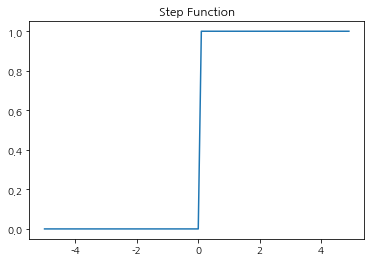

In [16]:
def step(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0,5.0,0.1)
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

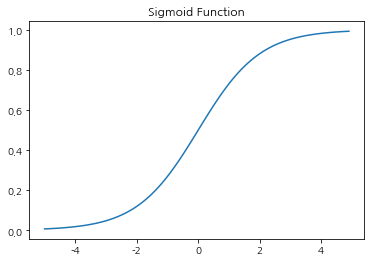

In [17]:
# sigmoid 함수
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.title('Sigmoid Function')
plt.show()

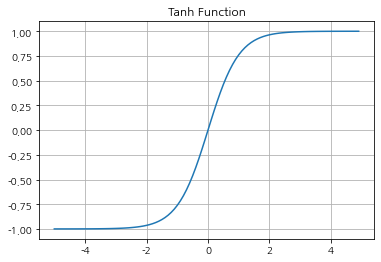

In [18]:
x = np.arange(-5.0,5.0,0.1)
y = np.tanh(x)
plt.plot(x,y)
plt.title('Tanh Function')
plt.grid()
plt.show()

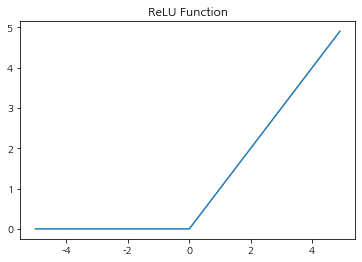

In [19]:
# ReLU 함수
def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0,5.0,0.1)
plt.plot(x, relu(x))
plt.grid()
plt.title('ReLU Function')
plt.grid()
plt.show()

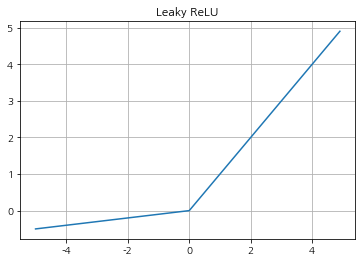

In [20]:
a = 0.1
def leaky_relu(x):
    return np.maximum(a*x,x)

plt.plot(x,leaky_relu(x))
plt.grid()
plt.title('Leaky ReLU')
plt.show()

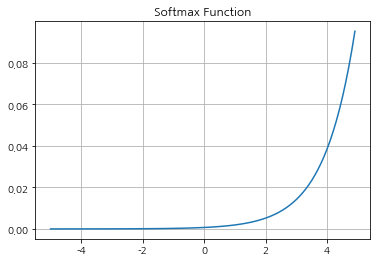

In [21]:
# Softmax 함수(출력층 layer에서 사용, 클래스 분류 문제에서 사용)
x = np.arange(-5.0,5.0,0.1)
y = np.exp(x)/np.sum(np.exp(x))

plt.plot(x,y)
plt.title('Softmax Function')
plt.grid()
plt.show()

# k-Nearest Neighbors

새로운 데이터 x와 가장 가까운 k개의 데이터를 통해 x를 분류하는 방법

- euclidean distance
$$\sqrt{(x_1-μ_1)^2 + (x_2-μ_2)^2+ ⋯ + (x_p-μ_p)^2}$$

- manhattan distance
$$|x_1-μ_1|+|x_2-μ_2|+⋯+|x_p-μ_p|$$

변수의 값이 가지는 스케일의 차이가 모델 학습에 영향을 미치는 것을 막기 위해 scaling 수행이 필요   
각 변수의 값 차이가 가졌던 정보는 남아있도록 scaling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import scipy as sp

In [36]:
mobile_price = pd.read_csv('train.csv')
print(mobile_price.shape)
mobile_price.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [37]:
mobile_price.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [38]:
columns = mobile_price.columns

X = mobile_price[columns[:-1]] # price는 예측해야 하는 값이기 때문에 제외시킴
y = mobile_price[columns[-1]]

SC = StandardScaler()
X = SC.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0)


In [39]:
print(len(x_train),len(x_test))

1800 200


In [40]:
for i in range(1, 12):
  knn_model=KNeighborsClassifier(n_neighbors=i,
                                metric='manhattan').fit(x_train, y_train)
  print(knn_model.score(x_train, y_train))
  print(knn_model.score(x_test, y_test))
  print('='*10)

1.0
0.37
0.7388888888888889
0.425
0.7316666666666667
0.435
0.7422222222222222
0.53
0.7311111111111112
0.545
0.7277777777777777
0.605
0.7233333333333334
0.61
0.7255555555555555
0.625
0.73
0.595
0.7216666666666667
0.595
0.7166666666666667
0.62


In [41]:
knn_model=KNeighborsClassifier(n_neighbors=8,
                              metric='manhattan').fit(x_train, y_train)

In [42]:
knn_model.predict_proba(x_test)[0]

array([0.   , 0.125, 0.375, 0.5  ])

In [45]:
knn_model.predict(x_test)[0]

3

In [46]:
# 유리 종류 분류류
glass = pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [47]:
glass.Type.unique()

array([1, 2, 3, 5, 6, 7])

In [50]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self, file_path):
    df = pd.read_csv(file_path)
    self.x1 = df.iloc[:, 0].values
    self.x2 = df.iloc[:,1].values
    self.x3 = df.iloc[:, 2].values
    self.x4 = df.iloc[:,3].values
    self.x5 = df.iloc[:, 4].values
    self.x6 = df.iloc[:,5].values
    self.x7 = df.iloc[:, 6].values
    self.x8 = df.iloc[:,7].values
    self.x9 = df.iloc[:,8].values
    self.y = df.iloc[:,9].values
    self.length = len(df)

  def __getitem__(self, index):
    x = torch.FloatTensor([self.x1[index], self.x2[index],self.x3[index], 
                           self.x4[index],self.x5[index], self.x6[index],
                           self.x7[index], self.x8[index],self.x9[index]])
    y = torch.LongTensor(self.y-1)[index]
    return x,y

  def __len__(self):
    return self.length


class CustomModel(nn.Module):
  def __init__(self):
    super(CustomModel, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Linear(9,256),
        nn.ReLU()
    )
    self.layer2 = nn.Sequential(
        nn.Linear(256,512),
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
        nn.Linear(512,128),
        nn.ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(128,18),
        nn.ReLU()
    )
    self.output_layer = nn.Sequential(
        nn.Linear(18,7),
        nn.Softmax()
    )

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    return x

train_dataset = CustomDataset('glass.csv')
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

device = 'cuda'
print(device)

model = CustomModel().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100000):
  cost = 0.0
  for x,y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost += loss

  cost = cost/len(train_dataloader)

  if (epoch + 1) % 1000 ==0:
    print(f'Epoch : {epoch+1:4d}, Cost : {cost:.3f}')

# with torch.no_grad():
#   model.eval()
#   print(glass[:10,:-1])
#   input = torch.FloatTensor([
#       [0,0],
#       [0,1],
#       [1,0],
#       [1,1]
#   ]).to(device)

#   outputs = model(input)

# print(outputs)
# print(outputs<=0.5)

cuda
Epoch : 1000, Cost : 6.238
Epoch : 2000, Cost : 6.238
Epoch : 3000, Cost : 6.238
Epoch : 4000, Cost : 6.238
Epoch : 5000, Cost : 6.238
Epoch : 6000, Cost : 6.238
Epoch : 7000, Cost : 6.238
Epoch : 8000, Cost : 6.238
Epoch : 9000, Cost : 6.238
Epoch : 10000, Cost : 6.238
Epoch : 11000, Cost : 6.238
Epoch : 12000, Cost : 6.238
Epoch : 13000, Cost : 6.238
Epoch : 14000, Cost : 6.238
Epoch : 15000, Cost : 6.238
Epoch : 16000, Cost : 6.238
Epoch : 17000, Cost : 6.238
Epoch : 18000, Cost : 6.238
Epoch : 19000, Cost : 6.238
Epoch : 20000, Cost : 6.238
Epoch : 21000, Cost : 6.238
Epoch : 22000, Cost : 6.238
Epoch : 23000, Cost : 6.238
Epoch : 24000, Cost : 6.238
Epoch : 25000, Cost : 6.238
Epoch : 26000, Cost : 6.238
Epoch : 27000, Cost : 6.238
Epoch : 28000, Cost : 6.238
Epoch : 29000, Cost : 6.238
Epoch : 30000, Cost : 6.238
Epoch : 31000, Cost : 6.238
Epoch : 32000, Cost : 6.238
Epoch : 33000, Cost : 6.238
Epoch : 34000, Cost : 6.238
Epoch : 35000, Cost : 6.238
Epoch : 36000, Cost : 6.

In [51]:
pd.read_csv('dataset.csv')

,a,b,c,class
0,3.16,7.72,3.63,obtuse triangle
1,9.46,8.48,7.74,acute triangle
2,7.23,8.58,8.40,acute triangle
3,5.73,3.82,9.95,obtuse triangle
4,3.07,6.10,6.83,right triangle
...,...,...,...,...
1495,3.01,4.86,5.71,right triangle
1496,4.42,9.34,8.23,right triangle
1497,9.24,9.51,6.91,acute triangle
1498,7.86,6.94,3.68,right triangle


In [52]:
pd.read_csv('dataset.csv')['class'].unique()

array(['obtuse triangle', 'acute triangle', 'right triangle'],
      dtype=object)

In [55]:
class CustomDataset(Dataset):
  def __init__(self, file_path):
    df = pd.read_csv(file_path)
    self.a = df.iloc[:, 0].values
    self.b = df.iloc[:,1].values
    self.c = df.iloc[:, 2].values
    self.y = df.iloc[:,3].values
    self.y = list(map(self.string_to_vector,self.y))
    self.length = len(df)
  
  def string_to_vector(self,value):
    key_value={'obtuse triangle':2, 'acute triangle':1, 'right triangle':0}
    return key_value[value]

  def __getitem__(self, index):
    x = torch.FloatTensor(sorted([self.a[index], self.b[index], self.c[index]]))
    y = torch.LongTensor(self.y)[index]
    return x,y

  def __len__(self):
    return self.length

class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()

        self.layer = nn.Sequential(
            nn.Linear(3,3)
            )
    def forward(self,x):
        return self.layer(x)

train_dataset = CustomDataset('dataset.csv')
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)
# drop_last 옵션은 마지막에 설정된 크기보다 작을 경우 데이터에 영향이 갈 수 있어서 마지막에 남은 사이즈보다 작은 값을 버리는 옵션
device='cuda'

model = CustomModel().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(10000):
  cost = 0.0
  for x,y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost += loss

  cost = cost/len(train_dataloader)

  if (epoch + 1) % 1000 ==0:
    print(f'Epoch : {epoch+1:4d}, Cost : {cost:.3f}')

Epoch : 1000, Cost : 0.227
Epoch : 2000, Cost : 0.141
Epoch : 3000, Cost : 0.102
Epoch : 4000, Cost : 0.082
Epoch : 5000, Cost : 0.068
Epoch : 6000, Cost : 0.057
Epoch : 7000, Cost : 0.050
Epoch : 8000, Cost : 0.043
Epoch : 9000, Cost : 0.039
Epoch : 10000, Cost : 0.036


In [64]:
with torch.no_grad(): # no_grad는 기울기를 업데이트 하지 않겠다는 뜻
  model.eval()
  classes = {2:'obtuse triangle', 1:'acute triangle', 0:'right triangle'}
  inputs = torch.FloatTensor(
      [
        [3.0,4.0,5.0],
        [3, 3, 3]
       
      ]
  ).to(device)

In [65]:
model(inputs)

tensor([[ 3.0974,  0.4910,  0.2661],
        [ 1.8231,  4.0386, -3.9660]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [66]:
import torch.nn.functional as F
print(torch.round(F.softmax(outputs, dim=1), decimals=2))
print(outputs.argmax(1))
print(list(map(classes.get, outputs.argmax(1).tolist())))

tensor([[1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')
tensor([0, 0, 0, 0], device='cuda:0')
['right triangle', 'right triangle', 'right triangle', 'right triangle']
